Faradias Izza Azzahra
<br>
H071191030
<br>
Source Dataset: https://www.kaggle.com/kingabzpro/heart-disease-patients

# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_patients.csv')
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


Label Description:
<br>


<ol>
<li>cp: chest pain type</li>
<li>trestbps: Resting blood pressure (mmHg)</li>
<li>chol: serum cholesterol (mg/dl)</li>
<li>fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li>restecg: Resting electrocardiography results</li>
    <li>thalach: Maximum heart rate achieved</li>
    <li>exang: Exercise induced angina (1 = yes; 0 = no)</li>
    <li>oldpeak: ST depression induced by exercise relative to rest</li>
    <li>The slope of the peak exercise ST segment</li>
</ol>  

In [3]:
df.drop(['cp','id','fbs','restecg','exang','slope'], axis=1, inplace=True)

df.head()

,age,sex,trestbps,chol,thalach,oldpeak
0,63,1,145,233,150,2.3
1,67,1,160,286,108,1.5
2,67,1,120,229,129,2.6
3,37,1,130,250,187,3.5
4,41,0,130,204,172,1.4


In [4]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['age','sex','trestbps','chol','thalach','oldpeak']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(303, 6)

In [5]:
data = pd.DataFrame(df_scale)
data.columns = ['age','sex','trestbps','chol','thalach','oldpeak']

data_cluster = data.copy()
data.head()

,age,sex,trestbps,chol,thalach,oldpeak
0,0.948726,0.686202,0.757525,-0.264900,0.017197,1.087338
1,1.392002,0.686202,1.611220,0.760415,-1.821905,0.397182
2,1.392002,0.686202,-0.665300,-0.342283,-0.902354,1.346147
3,-1.932564,0.686202,-0.096170,0.063974,1.637359,2.122573
4,-1.489288,-1.457296,-0.096170,-0.825922,0.980537,0.310912


In [6]:
data.describe()

,age,sex,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-1.538923e-17,2.931282e-18,4.259519e-16,2.418308e-16,-1.179841e-16,-1.700144e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.819115e+00,-1.457296e+00,-2.145037e+00,-2.334877e+00,-3.442067e+00,-8.968617e-01
25%,-7.135564e-01,-1.457296e+00,-6.652997e-01,-6.905030e-01,-7.053073e-01,-8.968617e-01
50%,1.729945e-01,6.862024e-01,-9.616980e-02,-1.101357e-01,1.485618e-01,-2.067053e-01
75%,7.270888e-01,6.862024e-01,4.729601e-01,5.476139e-01,7.178079e-01,4.834512e-01
max,2.500191e+00,6.862024e-01,3.887739e+00,6.138485e+00,2.294182e+00,4.451851e+00


# K-Means Clustering

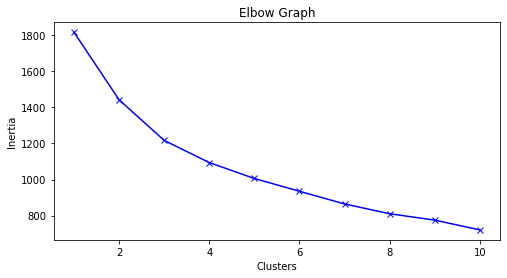

In [7]:
from sklearn.cluster import KMeans

clusters = []
K = range(1,11)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(data)
    clusters.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, clusters, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()



In [8]:
#Berdasarkan Elbow graph, kita tentutukan cluster number = 4
model_kmeans4 = KMeans(n_clusters=4)

model_kmeans4.fit(data)

data_cluster['cluster_kmeans4'] = model_kmeans4.labels_
data_cluster

,age,sex,trestbps,chol,thalach,oldpeak,cluster_kmeans4
0,0.948726,0.686202,0.757525,-0.264900,0.017197,1.087338,0
1,1.392002,0.686202,1.611220,0.760415,-1.821905,0.397182,0
2,1.392002,0.686202,-0.665300,-0.342283,-0.902354,1.346147,0
3,-1.932564,0.686202,-0.096170,0.063974,1.637359,2.122573,3
4,-1.489288,-1.457296,-0.096170,-0.825922,0.980537,0.310912,1
...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.234430,0.334813,-0.770990,0.138373,3
299,1.502821,0.686202,0.700612,-1.038723,-0.376896,2.036303,0
300,0.283813,0.686202,-0.096170,-2.238149,-1.515388,0.138373,0
301,0.283813,-1.457296,-0.096170,-0.206864,1.068113,-0.896862,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


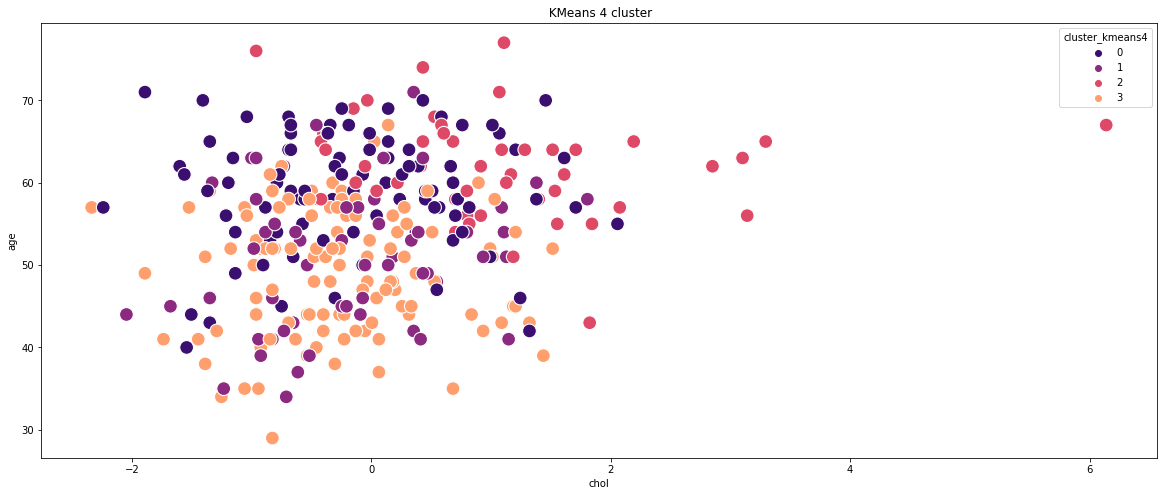

In [52]:
plt.figure(figsize=(20,8))
sns.scatterplot(data_cluster['chol'], df['age'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('magma',4), s=190)
plt.title(' KMeans 4 cluster')

plt.show()

# K-Medoids Clustering

In [10]:
from sklearn_extra.cluster import KMedoids

In [11]:
model_scale_kmedoids4 = KMedoids(n_clusters=4, method='pam', random_state=0).fit(data)
data_cluster['cluster_kmedoids4'] = model_scale_kmedoids4.labels_
data_cluster.head()

,age,sex,trestbps,chol,thalach,oldpeak,cluster_kmeans4,cluster_kmedoids4
0,0.948726,0.686202,0.757525,-0.264900,0.017197,1.087338,0,0
1,1.392002,0.686202,1.611220,0.760415,-1.821905,0.397182,0,0
2,1.392002,0.686202,-0.665300,-0.342283,-0.902354,1.346147,0,0
3,-1.932564,0.686202,-0.096170,0.063974,1.637359,2.122573,3,2
4,-1.489288,-1.457296,-0.096170,-0.825922,0.980537,0.310912,1,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


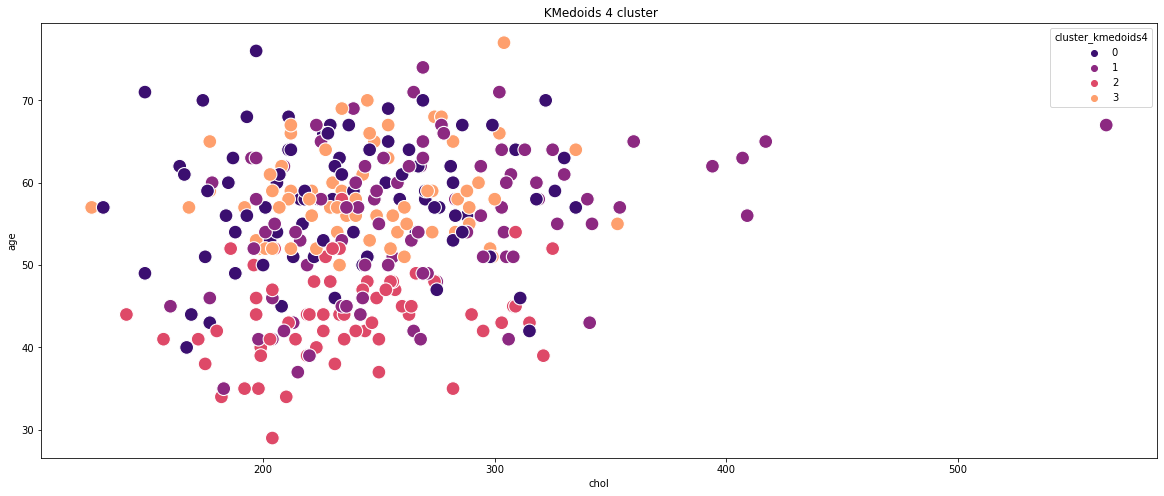

In [53]:
plt.figure(figsize=(20,8))
sns.scatterplot(df['chol'], df['age'], hue=data_cluster['cluster_kmedoids4'], palette=sns.color_palette('magma',4), s=190)
plt.title(' KMedoids 4 cluster')

plt.show()

# Hierarchical Clustering

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

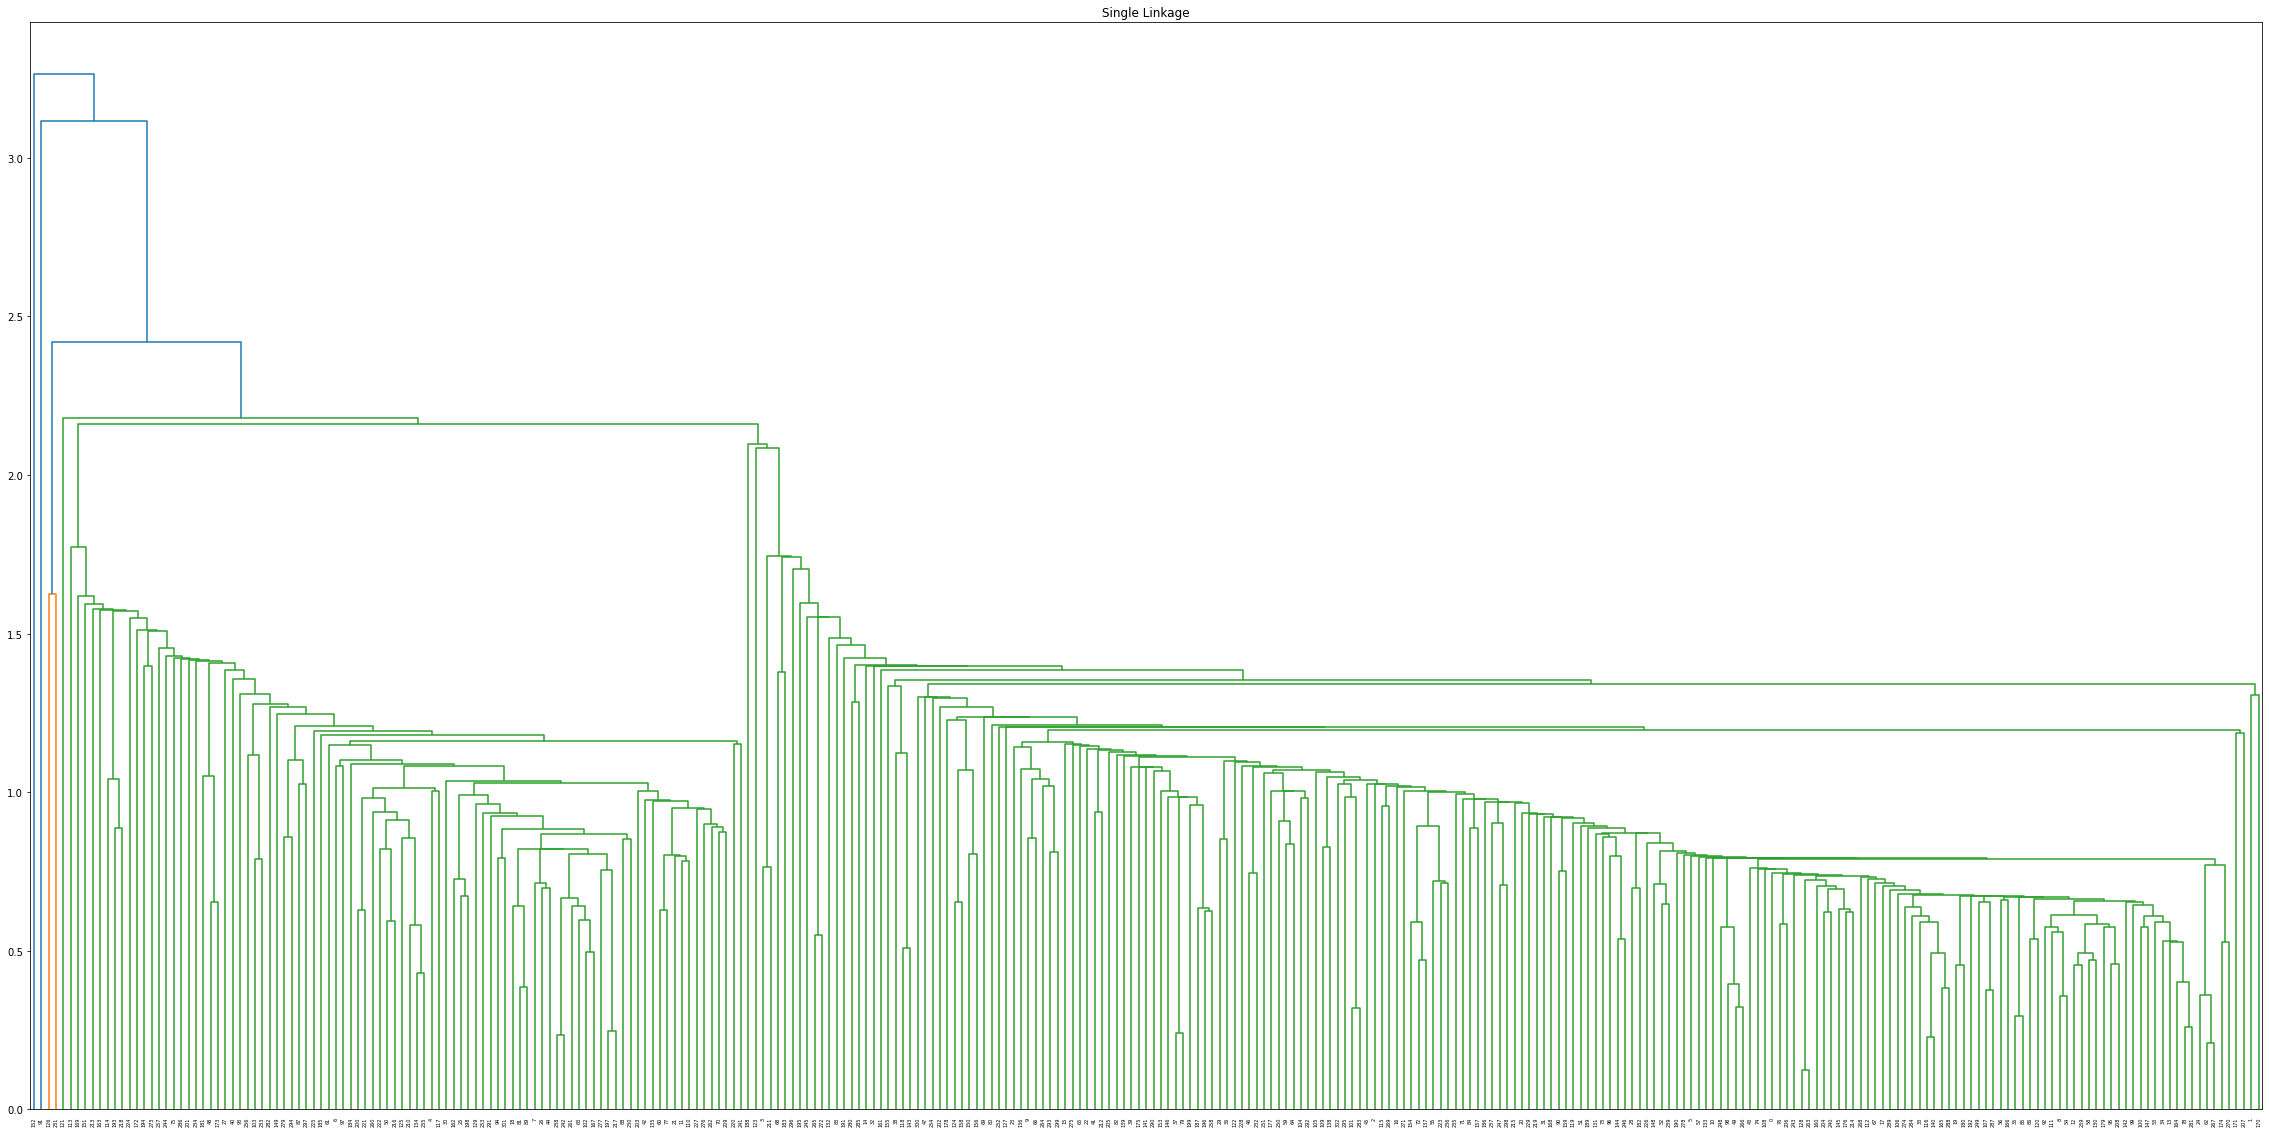

In [58]:
mergings_single = linkage(data, method="single", metric='euclidean')
plt.figure(figsize=(40, 20))
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

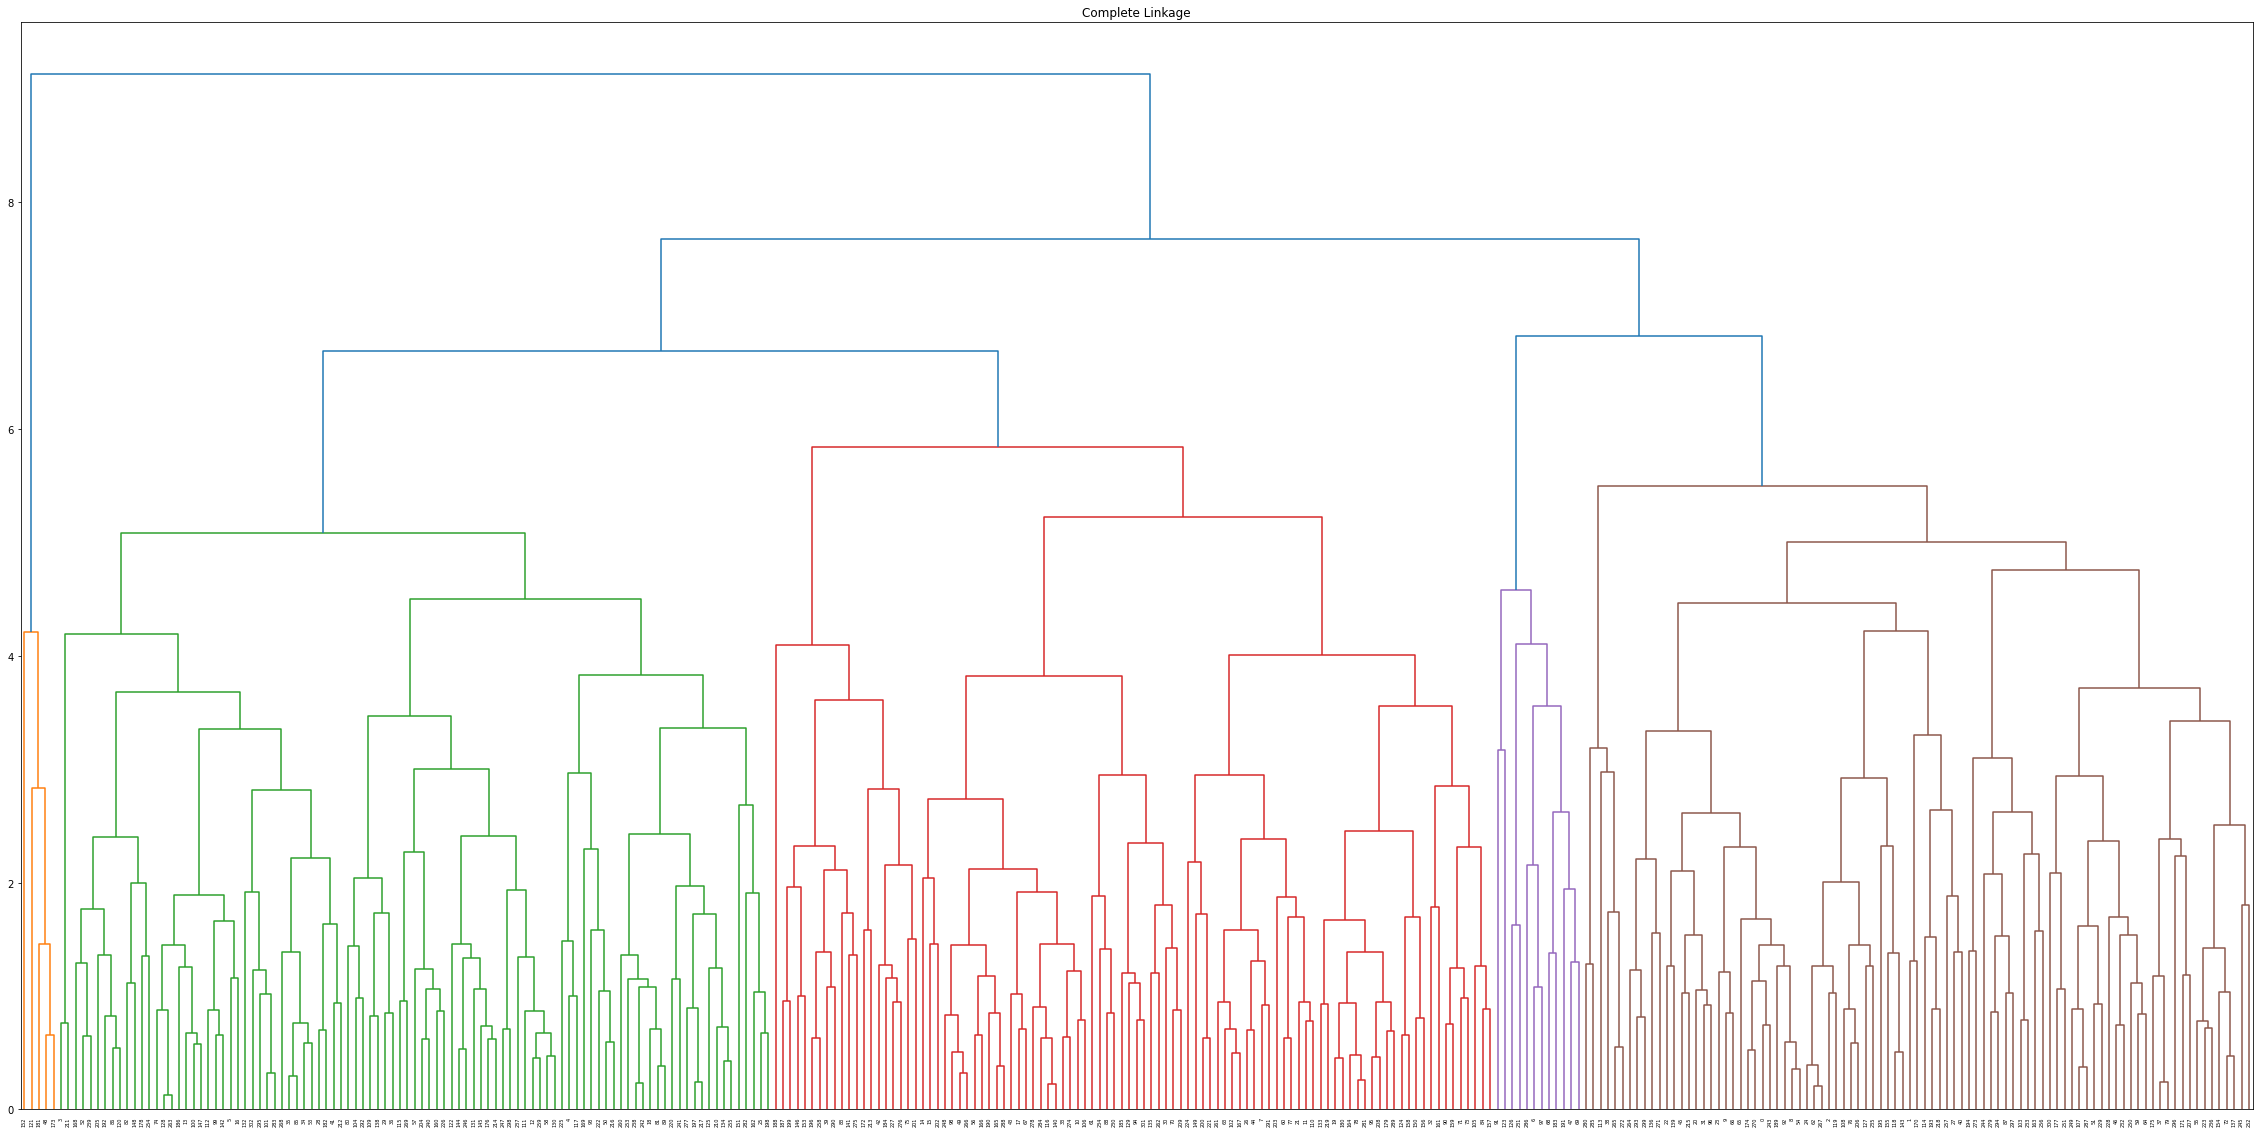

In [59]:
mergings_complete = linkage(data, method="complete", metric='euclidean')
plt.figure(figsize=(40, 20))
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [16]:
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 3, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3, 0, 0,
       1, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [17]:
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,age,sex,trestbps,chol,thalach,oldpeak,cluster_kmeans4,cluster_kmedoids4,cluster_hierarchy
0,0.948726,0.686202,0.757525,-0.264900,0.017197,1.087338,0,0,0
1,1.392002,0.686202,1.611220,0.760415,-1.821905,0.397182,0,0,0
2,1.392002,0.686202,-0.665300,-0.342283,-0.902354,1.346147,0,0,0
3,-1.932564,0.686202,-0.096170,0.063974,1.637359,2.122573,3,2,1
4,-1.489288,-1.457296,-0.096170,-0.825922,0.980537,0.310912,1,1,1
...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.234430,0.334813,-0.770990,0.138373,3,2,1
299,1.502821,0.686202,0.700612,-1.038723,-0.376896,2.036303,0,0,0
300,0.283813,0.686202,-0.096170,-2.238149,-1.515388,0.138373,0,0,0
301,0.283813,-1.457296,-0.096170,-0.206864,1.068113,-0.896862,1,1,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


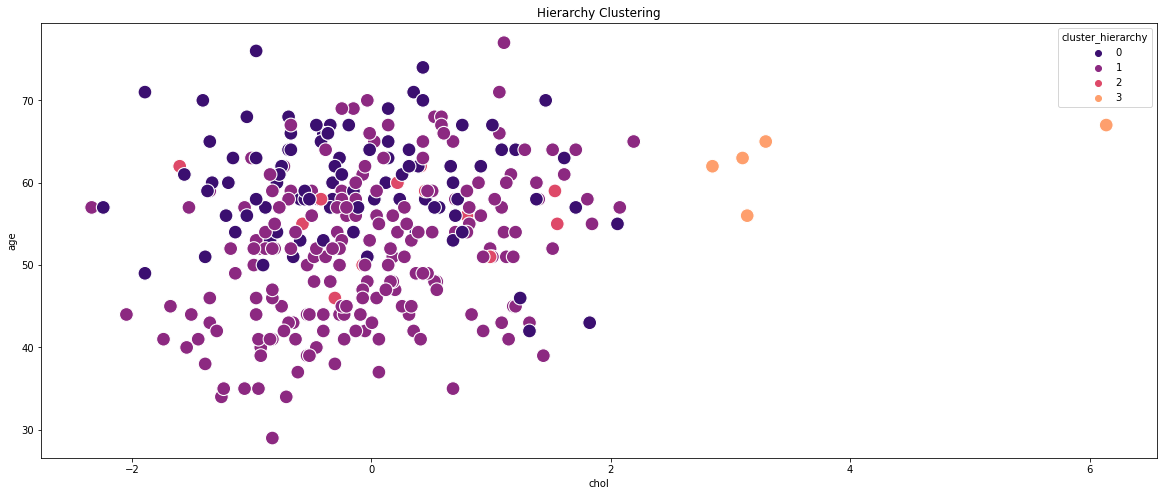

In [54]:
plt.figure(figsize=(20,8))
sns.scatterplot(data_cluster['chol'], df['age'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('magma',4), s=190)
plt.title('Hierarchy Clustering')
plt.show()

# Density-based Clustering

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np


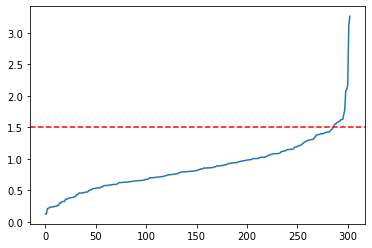

In [20]:
neigh = NearestNeighbors(n_neighbors=12)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

In [57]:
db = DBSCAN(eps=1.5, min_samples=12, metric='euclidean')


db.fit(data)

DBSCAN(eps=1.5, min_samples=12)

In [56]:
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,age,sex,trestbps,chol,thalach,oldpeak,cluster_kmeans4,cluster_kmedoids4,cluster_hierarchy,cluster_dbscan
0,0.948726,0.686202,0.757525,-0.264900,0.017197,1.087338,0,0,0,0
1,1.392002,0.686202,1.611220,0.760415,-1.821905,0.397182,0,0,0,-1
2,1.392002,0.686202,-0.665300,-0.342283,-0.902354,1.346147,0,0,0,0
3,-1.932564,0.686202,-0.096170,0.063974,1.637359,2.122573,3,2,1,-1
4,-1.489288,-1.457296,-0.096170,-0.825922,0.980537,0.310912,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.234430,0.334813,-0.770990,0.138373,3,2,1,0
299,1.502821,0.686202,0.700612,-1.038723,-0.376896,2.036303,0,0,0,0
300,0.283813,0.686202,-0.096170,-2.238149,-1.515388,0.138373,0,0,0,-1
301,0.283813,-1.457296,-0.096170,-0.206864,1.068113,-0.896862,1,1,1,1


In [23]:
data_cluster.describe()

,age,sex,trestbps,chol,thalach,oldpeak,cluster_kmeans4,cluster_kmedoids4,cluster_hierarchy,cluster_dbscan
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,-1.538923e-17,2.931282e-18,4.259519e-16,2.418308e-16,-1.179841e-16,-1.700144e-16,1.587459,1.382838,0.772277,-0.046205
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.252061,1.109249,0.596033,0.664505
min,-2.819115e+00,-1.457296e+00,-2.145037e+00,-2.334877e+00,-3.442067e+00,-8.968617e-01,0.000000,0.000000,0.000000,-1.000000
25%,-7.135564e-01,-1.457296e+00,-6.652997e-01,-6.905030e-01,-7.053073e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
50%,1.729945e-01,6.862024e-01,-9.616980e-02,-1.101357e-01,1.485618e-01,-2.067053e-01,2.000000,1.000000,1.000000,0.000000
75%,7.270888e-01,6.862024e-01,4.729601e-01,5.476139e-01,7.178079e-01,4.834512e-01,3.000000,2.000000,1.000000,0.000000
max,2.500191e+00,6.862024e-01,3.887739e+00,6.138485e+00,2.294182e+00,4.451851e+00,3.000000,3.000000,3.000000,1.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' DBSCAN clustering')

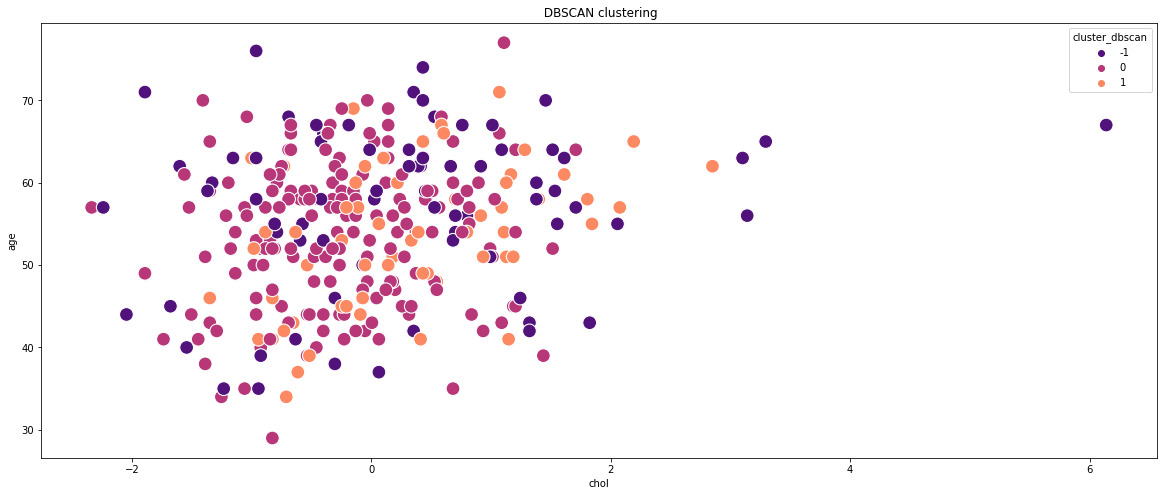

In [55]:
plt.figure(figsize=(20,8))
sns.scatterplot(data_cluster['chol'], df['age'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('magma',3), s=190)
plt.title(' DBSCAN clustering')